In [121]:
#How much money is this?
import pandas as pd
fiscal_data=pd.read_csv('C:\\Users\\manvi\\OneDrive\\Documents\\Information Visualisation\\Sdf16_1a\\Sdf16_1a.txt',sep="\t")
fiscal_data=fiscal_data.filter(['TFEDREV','STNAME','LEAID','TOTALREV','TOTALEXP'], axis=1)
fiscal_data_rev = fiscal_data[(fiscal_data[['TFEDREV']] > 0).all(axis=1)]
Remaining_amount=fiscal_data_rev['TFEDREV'].sum()*0.15

c:\users\manvi\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [122]:
#districts you selected for budget cuts in HW 3 Problem 4
fiscal_data_rev = fiscal_data_rev.assign(SURPLUS = ((fiscal_data_rev['TOTALREV']) - fiscal_data_rev['TOTALEXP']))
fiscal_data_rev.sort_values(by='SURPLUS',axis=0, ascending=False)
fiscal_data_rev=fiscal_data_rev[fiscal_data_rev['SURPLUS']>=fiscal_data_rev['TFEDREV']]
c=0
leaid=[]
revenue=[]
total_revenue=[]
state=[]
for i, j in fiscal_data_rev.iterrows(): 
    if c<=Remaining_amount:
        leaid.append(j['LEAID'])
        state.append(j['STNAME'])
        total_revenue.append(j['TOTALREV'])
        revenue.append(j['TFEDREV'])
        c=c+j['TFEDREV']
        
funding_cut = pd.DataFrame(
    {'LEAID': leaid,
     'STNAME':state,
     'TOTALREV':total_revenue,
     'CUT': revenue
    })

In [123]:
funding_cut_state=funding_cut.groupby(['STNAME'],as_index=False).sum()
funding_cut_state = funding_cut_state.assign(PROPORTION = ((funding_cut_state['CUT']/funding_cut_state['TOTALREV'])))
funding_cut_state=funding_cut_state.sort_values(by='PROPORTION', ascending=False)

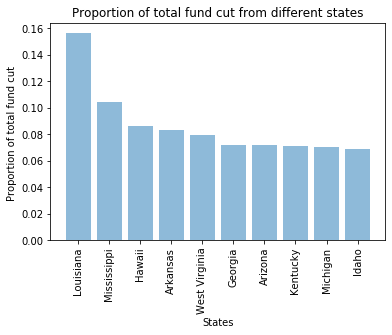

In [124]:
# calculate and visualize the proportion of each district’s total funding that will be lost.
import matplotlib.pyplot as plt

plt.bar(funding_cut_state['STNAME'][:10], funding_cut_state['PROPORTION'][:10], align='center', alpha=0.5)
plt.ylabel('Proportion of total fund cut ')
plt.xlabel('States')
plt.title('Proportion of total fund cut from different states')
plt.xticks(rotation=90)
plt.show()

In [125]:
racedata=pd.read_csv('C:\\Users\\manvi\\OneDrive\\Documents\\Information Visualisation\\ccd_lea_052_1516_w_1a_011717_csv\\ccd_lea_052_1516_w_1a_011717.csv')
racedata=racedata.filter(['STATENAME','LEAID','TOTAL','TR','HP','BL','HI','AS','AM','WH'], axis=1)
racedata = racedata[(racedata[['TOTAL']] > 0).all(axis=1)]
racedata = racedata.assign(TR_P = ((racedata['TR'])/ racedata['TOTAL']))
racedata = racedata.assign(HP_P = ((racedata['HP'])/ racedata['TOTAL']))
racedata = racedata.assign(BL_P = ((racedata['BL'])/ racedata['TOTAL']))
racedata = racedata.assign(HI_P = ((racedata['HI'])/ racedata['TOTAL']))
racedata = racedata.assign(AS_P = ((racedata['AS'])/ racedata['TOTAL']))
racedata = racedata.assign(AM_P = ((racedata['AM'])/ racedata['TOTAL']))
racedata = racedata.assign(WH_P = ((racedata['WH'])/ racedata['TOTAL']))

fund_cut_race = racedata.merge(funding_cut,on=['LEAID'])
no_fund_cut_race=racedata[(~racedata.LEAID.isin(fund_cut_race.LEAID))]

c:\users\manvi\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


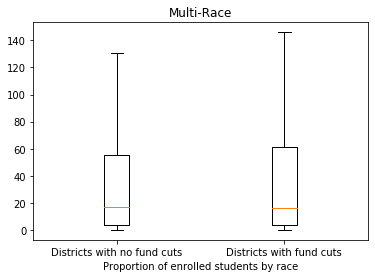

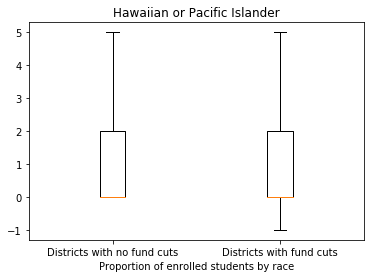

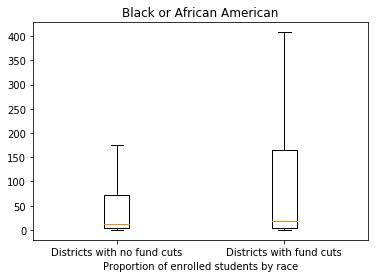

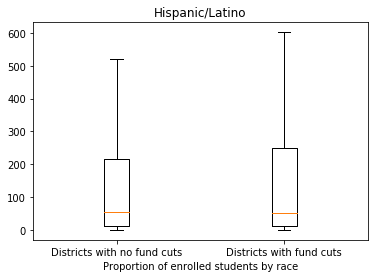

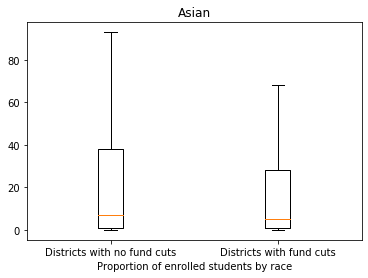

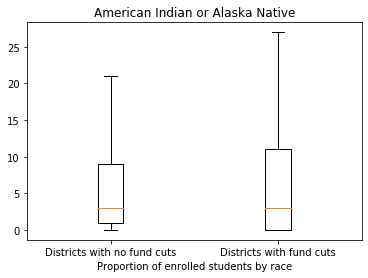

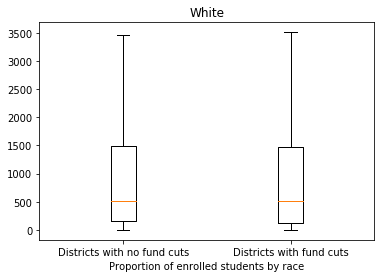

In [126]:
race_fullforms={'TR': 'Multi-Race','HP': 'Hawaiian or Pacific Islander','BL': 'Black or African American','HI': 'Hispanic/Latino', 'AS': 'Asian','AM': 'American Indian or Alaska Native','WH': 'White'}
for race in ['TR', 'HP', 'BL', 'HI', 'AS', 'AM', 'WH']:
    plt.boxplot([fund_cut_race[race], no_fund_cut_race[race]],showfliers=False)
    plt.title(race_fullforms[race])
    plt.xticks([1, 2], ["Districts with no fund cuts", "Districts with fund cuts"])
    plt.xlabel("Proportion of enrolled students by race")
    plt.show()

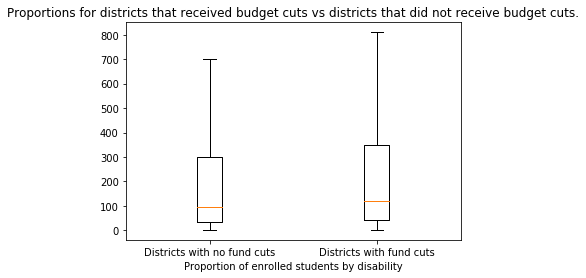

In [127]:
disability=pd.read_csv('C:\\Users\\manvi\\OneDrive\\Documents\\Information Visualisation\\ccd_lea_002089_1516_w_1a_011717_csv\\ccd_lea_002089_1516_w_1a_011717.csv')
disability=disability.filter(['STATENAME','LEAID','SPECED'], axis=1)
disability = disability.merge(racedata,on=['LEAID'])
disability=disability.filter(['STATENAME','LEAID','SPECED','TOTAL'], axis=1)
disability = disability[(disability[['SPECED']] > 0).all(axis=1)]
disability = disability.assign(PROPORTION = ((disability['SPECED'])/ disability['TOTAL']))
disability

fund_cut_disability = disability.merge(funding_cut,on=['LEAID'])
no_fund_cut_disability=disability[(~disability.LEAID.isin(fund_cut_disability.LEAID))]
no_fund_cut_disability

plt.boxplot([fund_cut_disability['SPECED'], no_fund_cut_disability['SPECED']],showfliers=False)
plt.title('Proportions for districts that received budget cuts vs districts that did not receive budget cuts.')
plt.xticks([1, 2], ["Districts with no fund cuts", "Districts with fund cuts"])
plt.xlabel("Proportion of enrolled students by disability")
plt.show()